### Intro to Scientific Python Ecosystem

In [1]:
import numpy as np

In [2]:
!head dummy.csv

0,0,1,3,1,2,4
0,1,2,1,2,1,3
0,1,1,3,3,2,6

Read dummy dataset with numpy

In [3]:
np.loadtxt?

Signature:
np.loadtxt(
    fname,
    dtype=<class 'float'>,
    comments='#',
    delimiter=None,
    converters=None,
    skiprows=0,
    usecols=None,
    unpack=False,
    ndmin=0,
    encoding='bytes',
    max_rows=None,
    *,
    like=None,
)
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of cha

In [4]:
import os
from pathlib import Path


BASE_FOLDER = Path(os.path.abspath(os.path.curdir))
DATA_FOLDER = BASE_FOLDER / "data"

In [5]:
dummy_data = np.loadtxt("dummy.csv", delimiter=",")

Playing with Attribute of `ndarray`

In [6]:
type(dummy_data)

numpy.ndarray

In [7]:
dummy_data.shape

(3, 7)

In [8]:
dummy_data.dtype

dtype('float64')

In [9]:
dummy_data

array([[0., 0., 1., 3., 1., 2., 4.],
       [0., 1., 2., 1., 2., 1., 3.],
       [0., 1., 1., 3., 3., 2., 6.]])

In [10]:
dummy_data = np.loadtxt("dummy.csv", delimiter=",", dtype=np.int32)

In [11]:
dummy_data.dtype

dtype('int32')

In [12]:
dummy_data

array([[0, 0, 1, 3, 1, 2, 4],
       [0, 1, 2, 1, 2, 1, 3],
       [0, 1, 1, 3, 3, 2, 6]], dtype=int32)

### Let's switch to some real data

$\rightarrow$ _Adapted from_ : [**Software Carpentries: Programming with Python**]()

## Arthritis Inflammation
We are studying **inflammation in patients** who have been given a new treatment for arthritis.

There are `60` patients, who had their inflammation levels recorded for `40` days.
We want to analyze these recordings to study the effect of the new arthritis treatment.

To see how the treatment is affecting the patients in general, we would like to:

1. Process the file to extract data for each patient;
2. Calculate some statistics on each patient;
    - e.g. average inflammation over the `40` days (or `min`, `max` .. and so on)
    - e.g average statistics per week (we will assume `40` days account for `5` weeks)
    - `...` (open to ideas)
3. Calculate some statistics on the dataset.
    - e.g. min and max inflammation registered overall in the clinical study;
    - e.g. the average inflammation per day across all patients.
    - `...` (open to ideas)


![3-step flowchart shows inflammation data records for patients moving to the Analysis step
where a heat map of provided data is generated moving to the Conclusion step that asks the
question, How does the medication affect patients?](
https://raw.githubusercontent.com/swcarpentry/python-novice-inflammation/gh-pages/fig/lesson-overview.svg "Lesson Overview")


### Data Format

The data sets are stored in
[comma-separated values] (CSV) format:

- each row holds information for a single patient,
- columns represent successive days.

The first three rows of our first file look like this:
~~~
0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
~~~

Each number represents the number of inflammation bouts that a particular patient experienced on a
given day.

For example, value "6" at row 3 column 7 of the data set above means that the third
patient was experiencing inflammation six times on the seventh day of the clinical study.

Our **task** is to gather as much information as possible from the dataset, and to report back to colleagues to foster future discussions.

In [13]:
if_data_01 = DATA_FOLDER / "inflammation-01.csv"

In [14]:
inf_data = np.loadtxt(if_data_01, delimiter=",", dtype=np.int32)

In [15]:
inf_data.shape

(60, 40)

In [16]:
inf_data.dtype

dtype('int32')

In [17]:
inf_data.size

2400

In [18]:
inf_data.itemsize

4

#### Slicing

In [19]:
inf_data[:3]

array([[ 0,  0,  1,  3,  1,  2,  4,  7,  8,  3,  3,  3, 10,  5,  7,  4,
         7,  7, 12, 18,  6, 13, 11, 11,  7,  7,  4,  6,  8,  8,  4,  4,
         5,  7,  3,  4,  2,  3,  0,  0],
       [ 0,  1,  2,  1,  2,  1,  3,  2,  2,  6, 10, 11,  5,  9,  4,  4,
         7, 16,  8,  6, 18,  4, 12,  5, 12,  7, 11,  5, 11,  3,  3,  5,
         4,  4,  5,  5,  1,  1,  0,  1],
       [ 0,  1,  1,  3,  3,  2,  6,  2,  5,  9,  5,  7,  4,  5,  4, 15,
         5, 11,  9, 10, 19, 14, 12, 17,  7, 12, 11,  7,  4,  2, 10,  5,
         4,  2,  2,  3,  2,  2,  1,  1]], dtype=int32)

In [20]:
inf_data[:3, :7]

array([[0, 0, 1, 3, 1, 2, 4],
       [0, 1, 2, 1, 2, 1, 3],
       [0, 1, 1, 3, 3, 2, 6]], dtype=int32)

### Performance Comparison Numpy vs Lists

In [21]:
%%timeit
matrix_lol = []
for i in range(10000):
    row = list()
    for j in range(1000):
        row.append(j)
    matrix_lol.append(row)


1.03 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
matrix_np = np.empty((10000, 1000), dtype=np.int32)
for i in range(10000):
    for j in range(1000):
        matrix_np[i, j] = j

1.98 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
matrix_np_faster = np.arange(10000*1000).reshape(10000, 1000)

19.3 ms ± 699 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Let's talk about patients

1. average inflammations per day (max and min)
2. median
3. standard deviation

#### Compute patient's averages with vanilla python

In [24]:
patients = list()
with open(if_data_01) as data_file:
    for line in data_file:
        line = line.strip()
        if not line:
            continue
        values = line.split(",")
        patient_data = list()
        for value in values:
            patient_data.append(int(value))
        patients.append(tuple(patient_data))
    

In [25]:
len(patients)

60

In [26]:
from typing import List, Tuple

def overall_average(patients: List[Tuple[int]]) -> float:
    n_values = 0
    sum_values = 0
    for patient in patients:
        n_values += len(patient)
        sum_values += sum(patient)
    return sum_values / n_values

In [27]:
%timeit overall_average(patients)

32.8 µs ± 798 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Average of the whole dataset with `np.mean`

In [28]:
%timeit inf_data.mean()

12.2 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
overall_average(patients)

6.14875

In [30]:
inf_data.mean()

6.14875

#### Average for each patient

In [31]:
average_per_patient = inf_data.mean(axis=1)

In [32]:
average_per_patient.shape

(60,)

In [33]:
average_per_patient

array([5.45 , 5.425, 6.1  , 5.9  , 5.55 , 6.225, 5.975, 6.65 , 6.625,
       6.525, 6.775, 5.8  , 6.225, 5.75 , 5.225, 6.3  , 6.55 , 5.7  ,
       5.85 , 6.55 , 5.775, 5.825, 6.175, 6.1  , 5.8  , 6.425, 6.05 ,
       6.025, 6.175, 6.55 , 6.175, 6.35 , 6.725, 6.125, 7.075, 5.725,
       5.925, 6.15 , 6.075, 5.75 , 5.975, 5.725, 6.3  , 5.9  , 6.75 ,
       5.925, 7.225, 6.15 , 5.95 , 6.275, 5.7  , 6.1  , 6.825, 5.975,
       6.725, 5.7  , 6.25 , 6.4  , 7.05 , 5.9  ])

**Start Lect 4**:

Let's compare time execution to Vanilla Python Implementation

In [51]:
%%timeit
def average_per_patient(patients: List[Tuple[int]]) -> List[float]:
    avg_patients = list()
    for patient_data in patients:
        # patient_data is a tuple
        avg_inflammation = sum(patient_data) / len(patient_data)
        avg_patients.append(avg_inflammation)
    return avg_patients

avg_inflammation_list = average_per_patient(patients)

35.2 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [50]:
len(avg_inflammation_list)

60

In [52]:
%timeit inf_data.mean(axis=1)

17 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Exercise:

Calculate Daily Inflammation Average

In [ ]:
# Vanilla Python Implementation

In [97]:
%%timeit
def daily_average_inflammation(patients: List[Tuple[int]]) -> List[float]:
    daily_inflammation = list()
    days = len(patients[0])  # get the total nr. of days from first patient data
    for day in range(days):  # iterate for all days
        day_average = 0  # average for current day
        for patient_data in patients:  # iterate over all the patient data
            day_average += patient_data[day]  # getting data for the current day (at day index)
        day_average /= len(patients)  # average
        daily_inflammation.append(day_average)  # appending to the daily    
    return daily_inflammation

avg_per_days = daily_average_inflammation(patients)


183 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
len(avg_per_days)

40

In [63]:
avg_per_days[:10]

[0.0,
 0.45,
 1.1166666666666667,
 1.75,
 2.433333333333333,
 3.15,
 3.8,
 3.8833333333333333,
 5.233333333333333,
 5.516666666666667]

In [67]:
%%timeit 
def daily_average_inflammmation_take2(patients: List[Tuple[int]]) -> List[float]:
    daily_inflammation = list()
    days = len(patients[0])
    for day in range(days):
        daily_inflammation.append([])
        
    for patient_data in patients:
        for day, inflammation_value in enumerate(patient_data):
            daily_inflammation[day].append(inflammation_value)
            
    # List of List of int 
    """
    daily_inflammation = [
       [ p1, p2, ....]  # day1
       [ p1, p2, ...]   # day2
    ]
    """
    
    average_inflammation = list()
    for daily_info in daily_inflammation:
        average_inflammation.append(sum(daily_info) / len(daily_info))
    return average_inflammation
avg_per_days_take2 = daily_average_inflammmation_take2(patients)

293 µs ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
len(avg_per_days_take2)

40

In [60]:
avg_per_days_take2[:10]

[0.0,
 0.45,
 1.1166666666666667,
 1.75,
 2.433333333333333,
 3.15,
 3.8,
 3.8833333333333333,
 5.233333333333333,
 5.516666666666667]

In [68]:
#Numpy
%timeit inf_data.T.mean(axis=1)

17.6 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [69]:
%timeit inf_data.mean(axis=0)

15.4 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [70]:
inf_data.mean(axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [72]:
inf_data_3d = inf_data.reshape(inf_data.shape[0], inf_data.shape[1], 1)
inf_data_3d.shape

(60, 40, 1)

In [73]:
inf_data_3d = inf_data[..., np.newaxis]
inf_data_3d.shape

(60, 40, 1)

In [77]:
inf_data_3d.mean(axis=2) == inf_data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [71]:
inf_data_3d = inf_data[:, :, np.newaxis, np.newaxis, np.newaxis]
inf_data_3d.shape

(60, 40, 1)

Side note on NumPy Slicing and Indexing

In [78]:
l = list(range(20))
l[::2]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [79]:
inf_data[::2, ::2].shape

(30, 20)

In [80]:
patient_index = np.asarray([0, 3, 2, 1, 6])
day_index = np.asarray([0, 1, 7])

In [82]:
inf_data[patient_index]

array([[ 0,  0,  1,  3,  1,  2,  4,  7,  8,  3,  3,  3, 10,  5,  7,  4,
         7,  7, 12, 18,  6, 13, 11, 11,  7,  7,  4,  6,  8,  8,  4,  4,
         5,  7,  3,  4,  2,  3,  0,  0],
       [ 0,  0,  2,  0,  4,  2,  2,  1,  6,  7, 10,  7,  9, 13,  8,  8,
        15, 10, 10,  7, 17,  4,  4,  7,  6, 15,  6,  4,  9, 11,  3,  5,
         6,  3,  3,  4,  2,  3,  2,  1],
       [ 0,  1,  1,  3,  3,  2,  6,  2,  5,  9,  5,  7,  4,  5,  4, 15,
         5, 11,  9, 10, 19, 14, 12, 17,  7, 12, 11,  7,  4,  2, 10,  5,
         4,  2,  2,  3,  2,  2,  1,  1],
       [ 0,  1,  2,  1,  2,  1,  3,  2,  2,  6, 10, 11,  5,  9,  4,  4,
         7, 16,  8,  6, 18,  4, 12,  5, 12,  7, 11,  5, 11,  3,  3,  5,
         4,  4,  5,  5,  1,  1,  0,  1],
       [ 0,  0,  2,  2,  4,  2,  2,  5,  5,  8,  6,  5, 11,  9,  4, 13,
         5, 12, 10,  6,  9, 17, 15,  8,  9,  3, 13,  7,  8,  2,  8,  8,
         4,  2,  3,  5,  4,  1,  1,  1]], dtype=int32)

In [83]:
inf_data[3]

array([ 0,  0,  2,  0,  4,  2,  2,  1,  6,  7, 10,  7,  9, 13,  8,  8, 15,
       10, 10,  7, 17,  4,  4,  7,  6, 15,  6,  4,  9, 11,  3,  5,  6,  3,
        3,  4,  2,  3,  2,  1], dtype=int32)

In [84]:
mask = (inf_data > 6)

In [85]:
type(mask)

numpy.ndarray

In [86]:
mask.dtype

dtype('bool')

In [87]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [88]:
mask.shape

(60, 40)

In [89]:
inf_data[mask]

array([ 7,  8, 10,  7,  7,  7, 12, 18, 13, 11, 11,  7,  7,  8,  8,  7, 10,
       11,  9,  7, 16,  8, 18, 12, 12,  7, 11, 11,  9,  7, 15, 11,  9, 10,
       19, 14, 12, 17,  7, 12, 11,  7, 10,  7, 10,  7,  9, 13,  8,  8, 15,
       10, 10,  7, 17,  7, 15,  9, 11,  7, 10,  8, 10, 17,  9, 14,  9,  7,
       13,  9, 12,  7,  7,  9,  7,  9,  9, 15, 16, 18, 12, 12, 18,  9, 10,
       12,  7,  8,  7,  8, 11,  9, 13, 12, 10,  9, 17, 15,  8,  9, 13,  7,
        8,  8,  8,  7,  8,  8, 10,  9, 15, 11, 18, 19, 20,  8, 13, 15, 10,
       10,  7,  9,  8, 11, 12, 10, 11,  9, 10, 17, 11, 16, 12,  8, 14, 13,
       10, 11,  7,  8,  8, 12, 13, 13,  8, 16,  8, 18, 15, 16, 14, 12,  7,
        8,  9, 11,  8,  7, 10, 13,  7, 13, 15, 18,  8, 15, 15, 16, 11, 14,
       12, 10, 10,  7,  8,  8, 11,  8, 14, 11, 11,  9, 16, 18, 12,  7,  8,
        7,  9,  9, 11, 12, 17, 13, 15, 13, 12,  8,  7,  7, 12,  9,  7, 13,
       10, 13,  9, 16, 15,  9, 11, 11, 11, 12,  8,  7, 10,  7, 13,  7, 17,
        9, 12, 13, 10, 12

In [92]:
inf_data[~(inf_data > 6)].shape

(1458,)

In [93]:
inf_data_copy = np.copy(inf_data)

In [94]:
inf_data_copy[(inf_data_copy <= 6)] = 0

In [95]:
inf_data_copy[:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  7,  8,  0,  0,  0, 10,  0,  7,  0,
         7,  7, 12, 18,  0, 13, 11, 11,  7,  7,  0,  0,  8,  8,  0,  0,
         0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 11,  0,  9,  0,  0,
         7, 16,  8,  0, 18,  0, 12,  0, 12,  7, 11,  0, 11,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

### Plotting with `matplotlib`

We will be using `matplotlib` to add in some visualisation of the Data

In [98]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Avg inflammations')

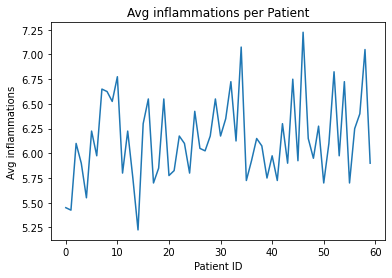

In [100]:
# plot a line with the computed means
plt.plot(inf_data.mean(axis=1))

# set the tile
plt.title("Avg inflammations per Patient")

# set the label for the x-axis
plt.xlabel("Patient ID")

# set the label for the y-axis
plt.ylabel("Avg inflammations")

#### Plot with scatter points instead of a continuous line

Text(0, 0.5, 'Avg inflammations')

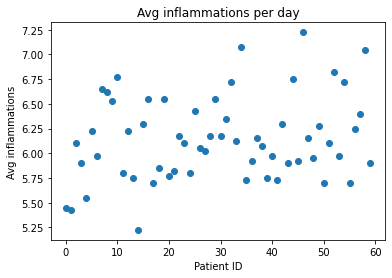

In [101]:
plt.plot(inf_data.mean(axis=1), 'o')

plt.title("Avg inflammations per day")
plt.xlabel("Patient ID")
plt.ylabel("Avg inflammations")

#### Compute mean and standard deviation (i.e. spread) of the distribution

In [ ]:
patient_means = inf_data.mean(axis=1)
patient_means.mean(), patient_means.std()

Text(0, 0.5, 'Avg inflammations')

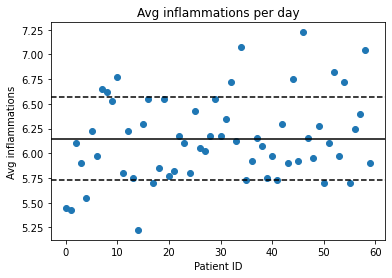

In [102]:
plt.plot(inf_data.mean(axis=1), 'o')

# plot an horizontal line
plt.axhline(patient_means.mean(), color='k')

# plot an horizontal line with a different style
plt.axhline(
    patient_means.mean() - patient_means.std(), 
    linestyle='--', 
    color='k'
)
plt.axhline(
    patient_means.mean() + patient_means.std(), 
    linestyle='--', 
    color='k'
)

plt.title("Avg inflammations per day")
plt.xlabel("Patient ID")
plt.ylabel("Avg inflammations")

#### Plot the line of a single patient

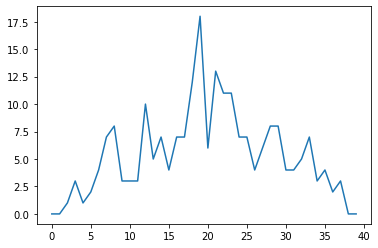

In [103]:
plt.plot(inf_data[0])

#### Plot a single line representing the daily averages

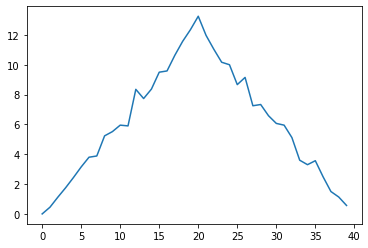

In [104]:
plt.plot(inf_data.mean(axis=0))

#### Try to plot all the lines together

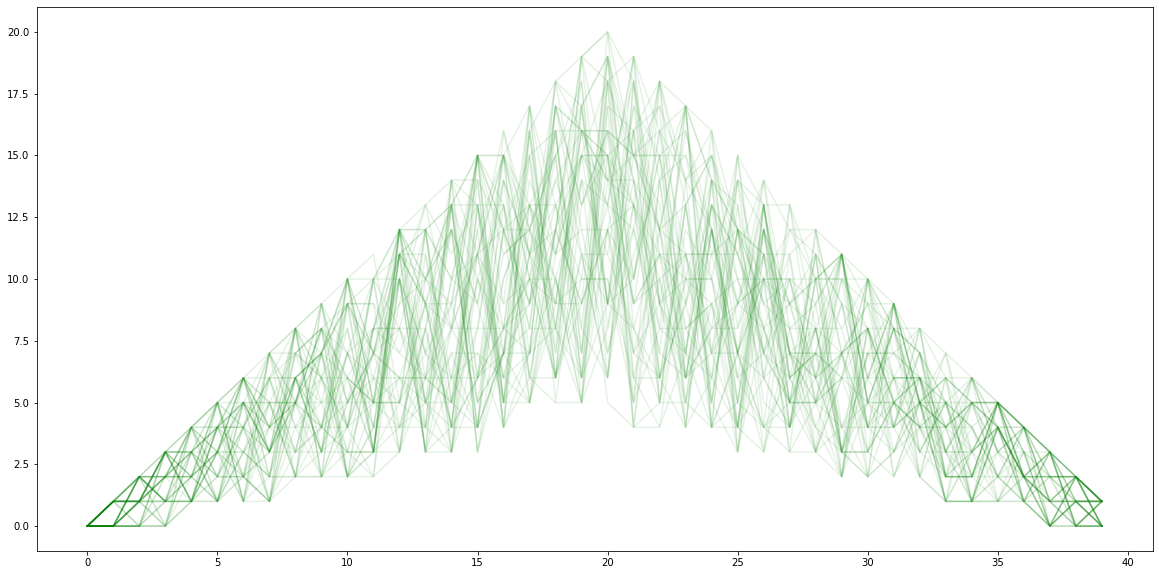

In [105]:
# create a figure of a larger size, 20x10 inches
plt.figure(figsize=(20, 10))

# data.T transposes the matrix, i.e. swap rows and columns
# the alpha parameter add some transparency
_ = plt.plot(inf_data.T, color='green', alpha=0.1)

#### Visualize the whole dataset with a heatmap

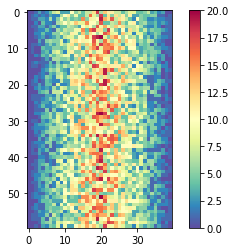

In [106]:
plt.imshow(inf_data, cmap='Spectral_r')
plt.colorbar()
plt.show()

---

## Solution 2 with Dictionary VS Numpy

```python
def overall_average(patients: Dataset) -> float:
    num_values = 0
    sum_of_values = 0
    for inflammation_data in patients.values():
        num_values += len(inflammation_data)
        sum_of_values += sum(inflammation_data)
    return sum_of_values / num_values
```

Let's recall what the implementation was like

Let's Now try to load `inflammation-02.csv` file in Numpy

In [107]:
DATA_FOLDER

PosixPath('/Users/valerio/Research/UoB/lectures/fbk-academy/2021/python-data-science/data')

In [ ]:
np.loadtxt?

In [111]:
inf_data_02 = np.loadtxt(DATA_FOLDER / "inflammation-02.csv", delimiter=",", dtype=str)

In [112]:
inf_data_02.dtype

dtype('<U4')

In [114]:
inf_data_02[:2, :10]

array([['669f', '0', '0', '1', '3', '1', '2', '4', '7', '8'],
       ['2edf', '0', '1', '2', '1', '2', '1', '3', '2', '2']], dtype='<U4')

In [116]:
from typing import Dict
DatasetNumpy = Dict[str, np.ndarray]

In [ ]:
def load_dataset_inflammation02(datapath: Path) -> DatasetNumpy:
    dataset = {}
    
    # np.asarray(LIST)
    
    return dataset

Looking for a better solution: introducing `pandas`

In [117]:
import pandas as pd

In [118]:
inf_data_pandas = pd.read_csv(DATA_FOLDER / "inflammation-02.csv", sep=",", header=None, index_col=None)

In [119]:
type(inf_data_pandas)

pandas.core.frame.DataFrame

In [ ]:
inf_dataframe = inf_data_pandas

Let's have a quick look at the structure: `print`?

Let's see the `shape` of the data

**Now** the question is: how different this new `pandas.DataFrame` is different from a `np.ndarray`?

Slicing & `pd.Series`

So let's try:

```python
inf_dataframe[3]
```

and then: 

```python
inf_dataframe[3:5]
```

and finally:

```python
inf_dataframe[2:6, 3:5]
```

First, what would it be the output if they were `np.ndarray`?

Adding information on Columns

Now let's take a `slice` of the original Data Frame and save it to a new `subdf` variable

Calculate Statistics with Pandas

Plot with Pandas

**GREAT TIME FOR A BREAK NOW!** ☕️🧁🍪